<a href="https://colab.research.google.com/github/reeda23/Deep-Learning-With-Pytorch/blob/main/2_Autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autograd package in Pytorch** 

We will see how can we calculate gradients with it. Gradients are essential for our model optimization so this is a very important concept that we should understand. Pytorch provides the autograd package which can do all the computations for us

In [1]:
import torch

In [2]:
x = torch.randn(3)
print(x)

tensor([0.4771, 0.9271, 0.7413])


Now let's say we want to calculate the gradient of some function with respect to x then we have to specify the agrument requires_grad = True

In [3]:
x = torch.randn(3, requires_grad=True)
print(x) #see pytorch tracks that it requires gradient

tensor([ 0.1215, -0.2963, -0.5798], requires_grad=True)


In [4]:
y = x + 2

Whenever we do some operations with tensors pytorch will create computationalgraph for us. With this graph and technique called back propagation we can then calculate the gradients 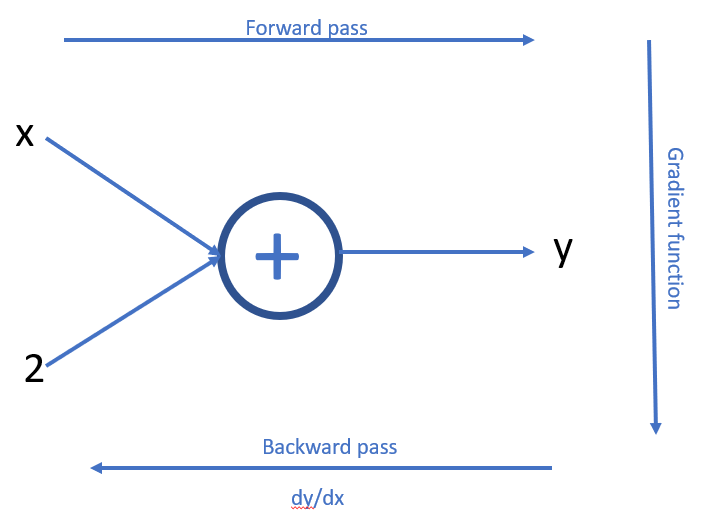

In [5]:
print(y)

tensor([2.1215, 1.7037, 1.4202], grad_fn=<AddBackward0>)


In [6]:
z = y*y*2
print(z)

tensor([9.0013, 5.8055, 4.0338], grad_fn=<MulBackward0>)


In [7]:
z = z.mean()
print(z)

tensor(6.2802, grad_fn=<MeanBackward0>)


When we want to compute gradient the only thing that we want to call is backward function.

In [8]:
z.backward() #this will compute gradient of z w.r.t x dz/dx
print(x.grad) #this is where gradients are stored

tensor([2.8286, 2.2717, 1.8936])


In [9]:
x = torch.randn(3, requires_grad=True)
print(x)

y = x+2
print(y)
z = y*y*2
print(z) 
#if last step is not scaler we have to do pass vector like this
v = torch.tensor([0.1,1.0,0.001], dtype=torch.float32)
z.backward(v)   #dz/dx   chain-rule  
print(x.grad)

tensor([-1.2803, -0.8732, -0.3490], requires_grad=True)
tensor([0.7197, 1.1268, 1.6510], grad_fn=<AddBackward0>)
tensor([1.0358, 2.5395, 5.4518], grad_fn=<MulBackward0>)
tensor([0.2879, 4.5073, 0.0066])


How can we prevent Pytorch from tracking the history? Sometimes during our training loop when we want to update our weights then tracking history should not be the part of gradient computation.


First Method
x.requires_grad_(False)

2nd Method
x.detach()  --this will create new tensor that doesn't require the gradient

3rd Method
with torch.no_grad(): 

In [10]:
x = torch.randn(3, requires_grad=True)
print(x)

tensor([ 0.9107, -0.3029,  1.4314], requires_grad=True)


In [11]:
#First Method
x.requires_grad_(False)
print(x)

tensor([ 0.9107, -0.3029,  1.4314])


In [12]:
#Second Method
y = x.detach()
print(y)

tensor([ 0.9107, -0.3029,  1.4314])


In [15]:

#Third Method
with torch.no_grad():
    y = x + 2
    print(y)



tensor([2.9107, 1.6971, 3.4314])
tensor([2.9107, 1.6971, 3.4314])


In [19]:
a = torch.randn(3, requires_grad=True)
print(a)

b = a+2
print(b)

tensor([ 1.3345, -1.1855, -0.9201], requires_grad=True)
tensor([3.3345, 0.8145, 1.0799], grad_fn=<AddBackward0>)


One more very important thing is that we should also know is that whenever we call the backward function then the gradient for this tensor will be accumlated into the dot grad attribute so their values will be summed up.

In [23]:
#For example

weights = torch.ones(4, requires_grad=True)

for epoch in range(2):
    model_output = (weights*3).sum()
    
    model_output.backward()

    print(weights.grad)



tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])


Notice that second backward call will again accumlate the values and write them into the grad attribute, so all the values are summed up and now our weights and our gradients are clearly incorrect so before we do the next iteration and optimization step we must empty the gradients so we must call weigths.grad.zero_()

In [24]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(2):
    model_output = (weights*3).sum()
    
    model_output.backward()

    print(weights.grad)

    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [26]:
#if we use built-in optimizer

weights = torch.ones(4, requires_grad=True)

#optimizer = torch.optim.SGD(weights, lr=0.01)
#optimizer.step()
#optimizer.zero_grad()